# Step 2: Data Cleaning

## A: Load the Necessary Libraries & Files

In [ ]:
# Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Files
customers_df = pd.read_csv('customers.csv')
geolocation_df = pd.read_csv('geolocation.csv')
order_items_df = pd.read_csv('order_items.csv')
orders_df = pd.read_csv('orders.csv')
payments_df = pd.read_csv('payments.csv')
products_df = pd.read_csv('products.csv')
sellers_df = pd.read_csv('sellers.csv')

## B: Test for Missing Data

### i. The customers table

In [5]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### ii. The geolocation table

In [6]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### iii. The order_items table


In [7]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### iv. The orders table

In [12]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders_df.shape

# So, it's only ~2-3% of delivered_dates that are missing data.

(99441, 8)

### v. The payments table

In [9]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### vi. The prouducts table

In [11]:
products_df.isnull().sum()

product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.shape

# less than 2% of data missing from category, name, description columns. 

(32951, 9)

### vii. The sellers table

In [16]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Takeaways: 
* Most tables, surprisingly, weren't missing any data
* Only the orders and products tables were missing any data at all, and then it was only ~2-3% of a handful of columns
* The columns in question may not even be relevant to the analysis (i.e. may be dropped anyways)

## C. Test for Irregular Data

### i. The customers table

In [ ]:
customers_df.head(1)

# No numeric columns



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


### ii. The geolocation table

In [ ]:
geolocation_df.head(1)

# No numeric data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


### iii. The order_items table

In [ ]:
order_items_df.head(1)

# Could look at the price and freight_value columns

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


#### A. The price column

In [ ]:
# get a quick idea with .describe()

order_items_df['price'].describe()

# it looks like the data may be skewed by a very high max value(s)

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

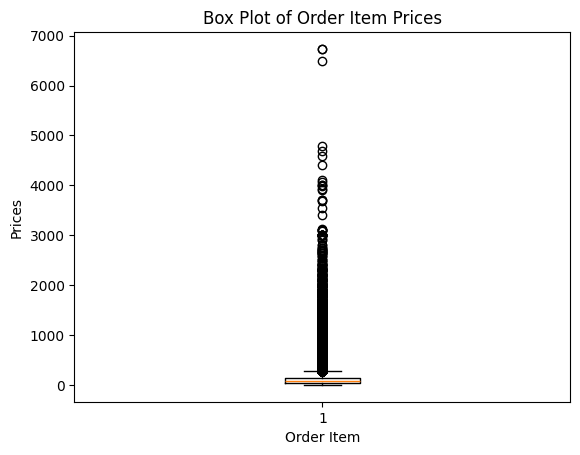

In [21]:
# get a better idea with a box-and-whisker plot

plt.boxplot(order_items_df['price'])
plt.title('Box Plot of Order Item Prices')
plt.xlabel('Order Item')
plt.ylabel('Prices')
plt.show()

In [ ]:
# Use the IRQ to remove outliers

# Check for NAs in the 'price' column
order_items_df.isna().sum()

# Calculate IQR and bounds
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = order_items_df[(order_items_df['price'] < lower_bound) | (order_items_df['price'] > upper_bound)]

price_filtered_order_items_df = order_items_df[
    (order_items_df['price'] >= lower_bound) & 
    (order_items_df['price'] <= upper_bound)
]

# Check the result
price_filtered_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


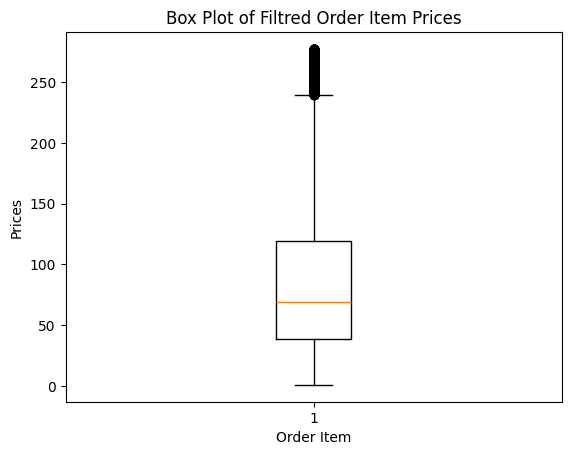

In [25]:
# Re-visualize

plt.boxplot(price_filtered_order_items_df['price'])
plt.title('Box Plot of Filtred Order Item Prices')
plt.xlabel('Order Item')
plt.ylabel('Prices')
plt.show()

In [26]:
# .describe() the filtered 'price' column to compare to plot

price_filtered_order_items_df['price'].describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64